# Визуализация данных - географические карты. Анализ ДТП в РФ

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datasets/dtp201804.csv', encoding="utf-8", delimiter = ";")
df

,reg_code,reg_name,road_code,road_name,road_type,oktmo,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,latitude,longitude
0,46,Московская область,NaN,мкр. Авиационный-Лямцино-ММК,Региональная или межмуниципальная дорога общег...,NaN,"ЦФО, Московская область, Городской округ Домод...",Опрокидывание,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,12,55.359795,37.906179
1,53,Оренбургская область,53К-2118000,Обход г. Оренбурга,Региональная или межмуниципальная дорога общег...,5.370100e+07,"ПФО, Оренбургская область, Оренбург",Наезд на препятствие,20181231,23:55:00,Другие нарушения ПДД водителями,1,0,1,2,51.785876,55.186837
2,46,Московская область,А-107,"""Московское малое кольцо"" Икша - Ногинск - Бро...",Федеральная дорога общего пользования,4.660800e+07,"ЦФО, Московская область, Дмитровский район",Опрокидывание,20181231,23:40:00,Превышение установленной скорости движения,1,0,1,2,56.137324,37.458766
3,8,Хабаровский край,А-375,"""Восток"" Хабаровск - Красный Яр - Ариадное - Ч...",Федеральная дорога общего пользования,8.655000e+06,"ДФО, Хабаровский край, Хабаровский район",Наезд на пешехода,20181231,23:20:00,Нахождение на проезжей части без цели её перех...,0,1,1,2,48.467142,135.439112
4,35,Республика Крым,35Н-076,Симферополь - Севастополь - Бахчисарай,Региональная или межмуниципальная дорога общег...,NaN,"ЮФО, Республика Крым, Бахчисарайский район",Наезд на пешехода,20181231,23:00:00,Нарушение правил проезда пешеходного перехода,1,0,1,2,44.744066,33.846538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39081,80,Республика Башкортостан,80Н-069,Аскарово - Альмухаметово - Сибай,Региональная или межмуниципальная дорога общег...,8.060143e+10,"ПФО, Республика Башкортостан, Абзелиловский ра...",Наезд на животное,20180401,1:55:00,Нарушение правил расположения ТС на проезжей ч...,2,0,1,4,53.207200,58.500000
39082,79,Республика Адыгея,NaN,Подъезд к а.Вочепший,Региональная или межмуниципальная дорога общег...,7.963300e+07,"ЮФО, Республика Адыгея, Теучежский район",Наезд на животное,20180401,1:30:00,Другие нарушения ПДД водителями,0,1,1,12,44.465000,39.107200
39083,3,Краснодарский край,Р-217,Подъезд к городу Майкоп от а/д Р-217,Федеральная дорога общего пользования,3.634000e+06,"ЮФО, Краснодарский край, Новокубанский район",Столкновение,20180401,1:00:00,"Выезд на полосу встречного движения в местах, ...",2,0,2,3,44.084400,41.000300
39084,76,Забайкальский край,А-350,Чита - Забайкальск - граница с Китайской Народ...,Федеральная дорога общего пользования,7.665016e+07,"СФО, Забайкальский край, Читинский район, Ново...",Опрокидывание,20180401,0:30:00,Нарушение правил расположения ТС на проезжей ч...,3,1,1,4,51.788900,113.786400


Вам предоставлен набор данных в виде файла dtp201804-1.csv, в котором содержится информация о дорожно-транспортных происшествиях в РФ за 2018 год.
- reg_code - код региона
- reg_name - название региона
- road_code - код трассы
- road_name - направление
- road_type - тип трассы
- oktmo - кодам ОКТМО
- address - адрес
- crash_type_name - тип происшествия
- crash_date - дата происшествия
- crash_time - время происшествия
- crash_reason - причина происшествия
- fatalities_amount - количество смертельных случаев
- victims_amount - количество жертв
- vehicles_amount - количество транспортных средств
- participants_amount - количество участников
- latitude - широта
- longitude - долгота

Для установки библиотек рекомендуется использовать параметр --no-cache-dir.

Пояснение. 
Опция --no-cache-dir в командах pip (менеджере пакетов Python) отключает кэширование загружаемых пакетов. В нашем случае это нужно для экономии места на диске.


In [3]:
pip install --no-cache-dir folium


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Задание 1: Тепловая карта ДТП по регионам России
Показать плотность ДТП в разных регионах.

Использовать folium или plotly для создания тепловой карты.

Доп. анализ: Выделить регионы с наибольшим числом ДТП.

In [4]:
import folium
from folium.plugins import HeatMap

# Создаем карту России
russia_map = folium.Map(location=[61.5240, 105.3188], zoom_start=4)  # Координаты центра России

# Готовим данные для тепловой карты
heat_data = df[['latitude', 'longitude']].dropna().values.tolist()

# Добавляем тепловой слой
HeatMap(heat_data, radius=12).add_to(russia_map)

# Выводим карту
russia_map

In [5]:
# выделяем регионы с наибольшим числом ДТП
top_regions = df['reg_name'].value_counts().head(10)
print("Топ-10 регионов с наибольшим числом ДТП:")
print(top_regions)

Топ-10 регионов с наибольшим числом ДТП:
reg_name
Московская область         2764
Краснодарский край         2294
Ленинградская область      1425
Республика Башкортостан    1075
Ставропольский край         956
Ростовская область          948
Москва                      933
Республика Татарстан        876
Владимирская область        841
Красноярский край           803
Name: count, dtype: int64


## Задание 2:  ДТП с жертвами (folium)

Показать участки дорог, где количество смертельных случаев больше 10 человек. 

Добавить количество жертв (число погибших) на карту в виде подписей к маркерам, можно использовать folium.DivIcon для создания текстовых меток. 
Добавьте тултипы - всплывающие сообщения (при наведении), на которых отображается причина происшествия, дата аварии в формате (dd.mm.YYYY), тип происшествия. 

Метод: для folium метод CircleMarker. 


In [6]:
# Фильтрация данных: выбираем только случаи с количеством погибших > 10
filtered_df = df[df['fatalities_amount'] > 10]

# Создаем базовую карту России
russia_map = folium.Map(location=[61.5240, 105.3188], zoom_start=4)  # Координаты центра России

# Добавляем маркеры на карту
for idx, row in filtered_df.iterrows():
    # Проверяем, что координаты не NaN
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        lat, lon = row['latitude'], row['longitude']
        
        # Количество погибших
        fatalities = row['fatalities_amount']
        
        # Информация для всплывающего окна (popup)
        crash_reason = str(row['crash_reason'])  # Преобразуем в строку
        crash_date = pd.to_datetime(str(row['crash_date']), format='%Y%m%d').strftime('%d.%m.%Y')
        crash_type = str(row['crash_type_name'])  # Преобразуем в строку
        
        # Формируем текст для popup
        popup_text = f"Причина: {crash_reason}\nДата: {crash_date}\nТип: {crash_type}"
        
        # Создаем кастомную HTML-иконку с числом погибших
        icon_html = f"""
        <div style="
            font-size: 12pt; 
            color: white; 
            background-color: red; 
            border-radius: 50%; 
            width: 30px; 
            height: 30px; 
            text-align: center; 
            line-height: 30px;
        ">
            {fatalities}
        </div>
        """
        
        # Добавляем маркер с кастомной иконкой
        folium.Marker(
            location=[lat, lon],
            popup=folium.Popup(popup_text, max_width=300),  # Всплывающее окно
            icon=folium.DivIcon(html=icon_html)  # Кастомная HTML-иконка
        ).add_to(russia_map)

# Выводим карту
russia_map

Ответьте на вопросы: какое максимальное число смертельных случаев в данном наборе? в какой области и когда это случилось?

In [7]:
# Находим строку с максимальным числом смертельных случаев
max_fatalities_row = df.loc[df['fatalities_amount'].idxmax()]

# Извлекаем информацию о максимальном случае
max_fatalities = max_fatalities_row['fatalities_amount']
region = max_fatalities_row['reg_name']
date = pd.to_datetime(str(max_fatalities_row['crash_date']), format='%Y%m%d').strftime('%d.%m.%Y')
crash_type = max_fatalities_row['crash_type_name']
crash_reason = max_fatalities_row['crash_reason']

# Выводим результаты
print(f"Максимальное число смертельных случаев: {max_fatalities}")
print(f"Регион: {region}")
print(f"Дата: {date}")
print(f"Тип происшествия: {crash_type}")
print(f"Причина: {crash_reason}")

Максимальное число смертельных случаев: 46
Регион: Псковская область
Дата: 22.05.2018
Тип происшествия: Съезд с дороги
Причина: Другие нарушения ПДД водителями


## Задание 3: Причины и типы самых ужастных происшествий
Изменить карту из задания 2, добавить стили для маркеров - отдельные типы происшествий должны быть отображаться отдельным цветов.
В легенде  вывести цвет - тип происшествия. 


In [8]:
# Фильтрация данных: выбираем только случаи с количеством погибших > 10
filtered_df = df[df['fatalities_amount'] > 10]

# Создаем базовую карту России
russia_map = folium.Map(location=[61.5240, 105.3188], zoom_start=4)  # Координаты центра России

# Определяем уникальные типы происшествий
unique_types = filtered_df['crash_type_name'].unique()

# Назначаем цвета для каждого типа происшествия
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
type_color_mapping = {type_: colors[i % len(colors)] for i, type_ in enumerate(unique_types)}

# Добавляем маркеры на карту
for idx, row in filtered_df.iterrows():
    # Проверяем, что координаты не NaN
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        lat, lon = row['latitude'], row['longitude']
        
        # Количество погибших
        fatalities = row['fatalities_amount']
        
        # Информация для всплывающего окна (popup)
        crash_reason = str(row['crash_reason'])  # Преобразуем в строку
        crash_date = pd.to_datetime(str(row['crash_date']), format='%Y%m%d').strftime('%d.%m.%Y')
        crash_type = str(row['crash_type_name'])  # Преобразуем в строку
        
        # Формируем текст для popup
        popup_text = f"Причина: {crash_reason}\nДата: {crash_date}\nТип: {crash_type}"
        
        # Определяем цвет для текущего типа происшествия
        color = type_color_mapping[crash_type]
        
        # Создаем кастомную HTML-иконку с числом погибших и цветом
        icon_html = f"""
        <div style="
            font-size: 12pt; 
            color: white; 
            background-color: {color}; 
            border-radius: 50%; 
            width: 30px; 
            height: 30px; 
            text-align: center; 
            line-height: 30px;
        ">
            {fatalities}
        </div>
        """
        
        # Добавляем маркер с кастомной иконкой
        folium.Marker(
            location=[lat, lon],
            popup=folium.Popup(popup_text, max_width=300),  # Всплывающее окно
            icon=folium.DivIcon(html=icon_html)  # Кастомная HTML-иконка
        ).add_to(russia_map)

# Добавляем легенду на карту
legend_html = '''
<div style="
    position: fixed; 
    bottom: 50px; 
    left: 50px; 
    z-index: 1000; 
    background-color: white; 
    padding: 10px; 
    border-radius: 5px; 
    box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
">
    <b>Легенда:</b><br>
'''

for type_, color in type_color_mapping.items():
    legend_html += f'<span style="color: {color}; font-size: 20px;">●</span> {type_}<br>'

legend_html += '</div>'

# Добавляем легенду на карту
russia_map.get_root().html.add_child(folium.Element(legend_html))

# Выводим карту
russia_map

Ответьте на вопросы: каких типов происшествий больше всего? какова основная причина таких происшествий?

🚗💥 НЕ ДЕЛАЙТЕ ТАК! СОБЛЮДАЙТЕ ПДД!

In [9]:
# 1. Определяем типы происшествий с наибольшим количеством случаев
top_crash_types = df['crash_type_name'].value_counts().head(5)
print("Топ-5 типов происшествий:")
top_crash_types

Топ-5 типов происшествий:


crash_type_name
Столкновение            18851
Опрокидывание            6423
Наезд на пешехода        4754
Наезд на препятствие     3102
Съезд с дороги           2752
Name: count, dtype: int64

In [10]:
# 2. Для каждого типа происшествия определяем самую основную причину
for crash_type in top_crash_types.index:
    print(f"\nСамая основная причина для типа '{crash_type}':")
    # Находим самую частую причину для данного типа
    main_reason = df[df['crash_type_name'] == crash_type]['crash_reason'].value_counts().idxmax()
    main_reason_count = df[df['crash_type_name'] == crash_type]['crash_reason'].value_counts().max()
    
    print(f"Причина: {main_reason}")
    print(f"Количество случаев: {main_reason_count}")


Самая основная причина для типа 'Столкновение':
Причина: Неправильный выбор дистанции
Количество случаев: 4270

Самая основная причина для типа 'Опрокидывание':
Причина: Другие нарушения ПДД водителями
Количество случаев: 2407

Самая основная причина для типа 'Наезд на пешехода':
Причина: Нарушение правил проезда пешеходного перехода
Количество случаев: 966

Самая основная причина для типа 'Наезд на препятствие':
Причина: Другие нарушения ПДД водителями
Количество случаев: 1162

Самая основная причина для типа 'Съезд с дороги':
Причина: Другие нарушения ПДД водителями
Количество случаев: 1128


In [11]:
# 3. Находим самый частый тип происшествия
most_common_crash_type = df['crash_type_name'].value_counts().idxmax()
print(f"Самый частый тип происшествия: {most_common_crash_type}")

# 4. Находим самую частую причину для этого типа
most_common_reason = df[df['crash_type_name'] == most_common_crash_type]['crash_reason'].value_counts().idxmax()
most_common_reason_count = df[df['crash_type_name'] == most_common_crash_type]['crash_reason'].value_counts().max()

print(f"Самая частая причина для типа '{most_common_crash_type}': {most_common_reason}")
print(f"Количество случаев: {most_common_reason_count}")

Самый частый тип происшествия: Столкновение
Самая частая причина для типа 'Столкновение': Неправильный выбор дистанции
Количество случаев: 4270


## Задание 4: Анализ ДТП по времени суток

Показать динамику аварийности в течение дня.

Выведите три диаграммы:
1. Распределение ДТП по времени суток:
- Столбчатая диаграмма с количеством аварий для каждого периода: ('Ночь (0-6)', 'Утро (6-12)', 'День (12-18)', 'Вечер (18-24)') - разделение на ночь/утро/день/вечер
- Цветовая кодировка периодов суток

2. Типы ДТП по времени суток:
- Накопительная столбчатая диаграмма - какие типы аварий преобладают в разное время

3. Тяжесть ДТП по часам:
- Линейный график средней тяжести аварий
- Отдельные линии для погибших и пострадавших

Вывести легенду по типам ДТП.


/tmp/ipykernel_120/3743242867.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='time_period', palette='viridis', order=['Ночь (0-6)', 'Утро (6-12)', 'День (12-18)', 'Вечер (18-24)'])


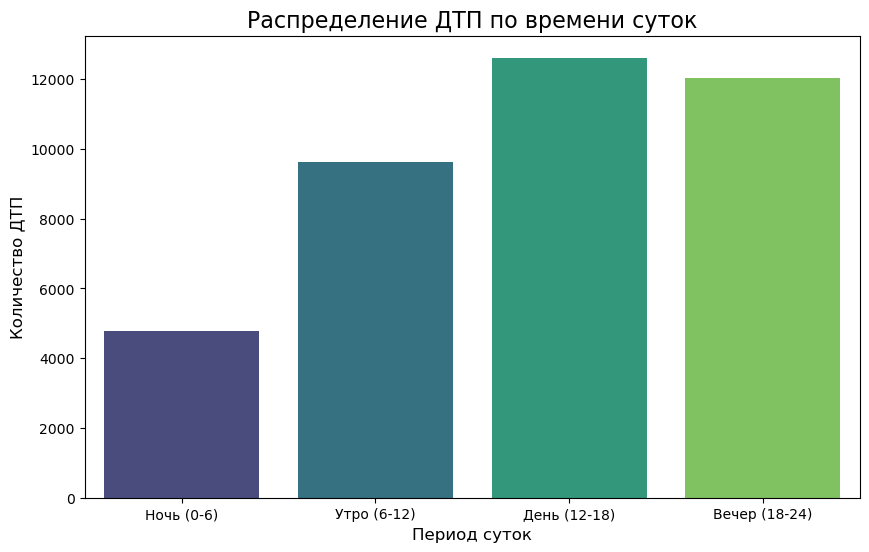

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразование столбца crash_time в формат времени
df['crash_time'] = pd.to_datetime(df['crash_time'], format='%H:%M:%S')

# Создаем новый столбец с периодом суток
def get_time_period(hour):
    if 0 <= hour < 6:
        return 'Ночь (0-6)'
    elif 6 <= hour < 12:
        return 'Утро (6-12)'
    elif 12 <= hour < 18:
        return 'День (12-18)'
    else:
        return 'Вечер (18-24)'

df['time_period'] = df['crash_time'].dt.hour.apply(get_time_period)

# 1. Распределение ДТП по времени суток (столбчатая диаграмма)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='time_period', palette='viridis', order=['Ночь (0-6)', 'Утро (6-12)', 'День (12-18)', 'Вечер (18-24)'])
plt.title('Распределение ДТП по времени суток', fontsize=16)
plt.xlabel('Период суток', fontsize=12)
plt.ylabel('Количество ДТП', fontsize=12)
plt.show()

/tmp/ipykernel_120/704212968.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

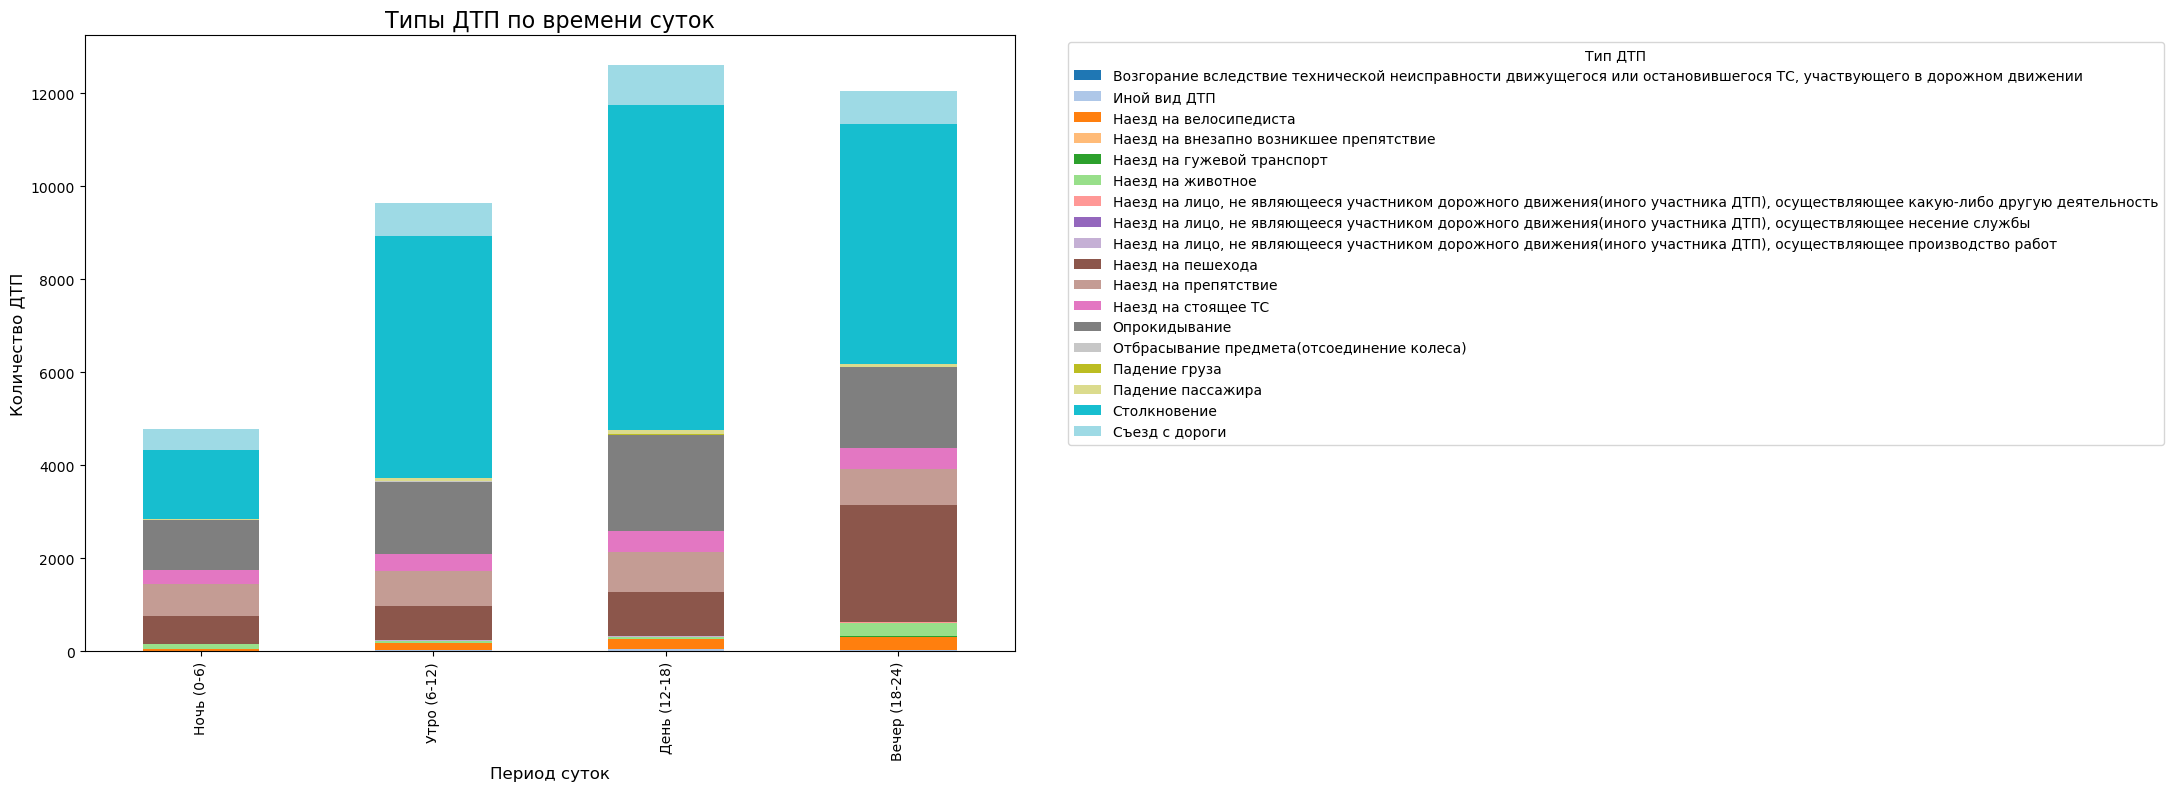

In [13]:
# 2. Типы ДТП по времени суток (накопительная столбчатая диаграмма)
plt.figure(figsize=(12, 8))
pivot_df = df.groupby(['time_period', 'crash_type_name']).size().unstack(fill_value=0)
pivot_df = pivot_df.reindex(['Ночь (0-6)', 'Утро (6-12)', 'День (12-18)', 'Вечер (18-24)'])

pivot_df.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 8))
plt.title('Типы ДТП по времени суток', fontsize=16)
plt.xlabel('Период суток', fontsize=12)
plt.ylabel('Количество ДТП', fontsize=12)
plt.legend(title='Тип ДТП', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

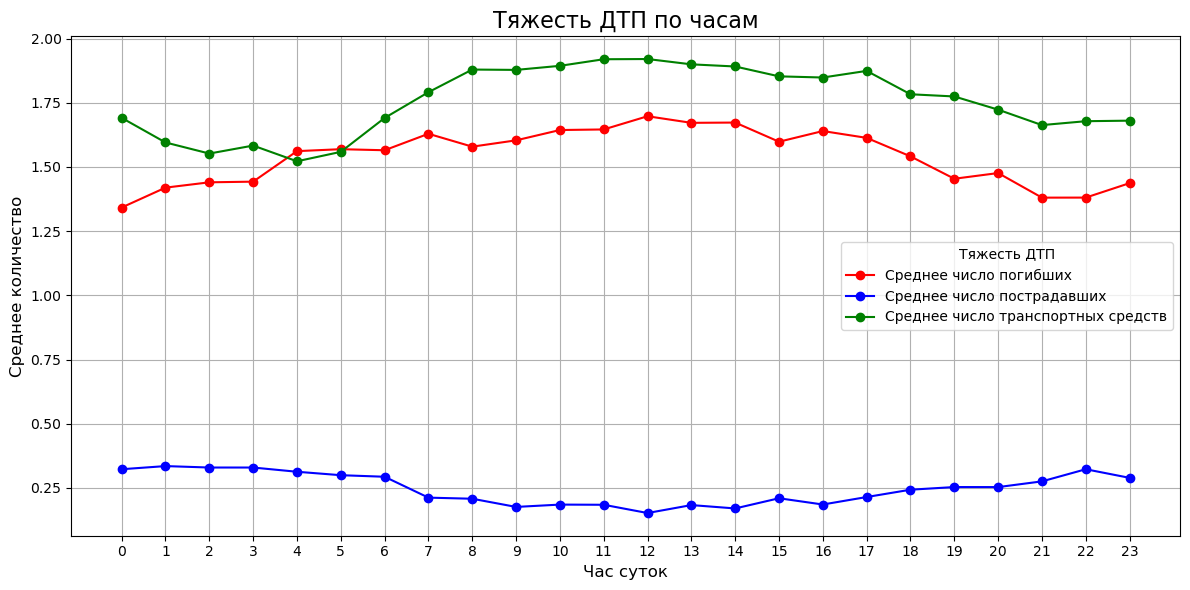

In [14]:
# 3. Тяжесть ДТП по часам
hourly_stats = df.groupby(df['crash_time'].dt.hour).agg({
    'fatalities_amount': 'mean',
    'victims_amount': 'mean',
    'vehicles_amount': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(hourly_stats['crash_time'], hourly_stats['fatalities_amount'], label='Среднее число погибших', marker='o', color='red')
plt.plot(hourly_stats['crash_time'], hourly_stats['victims_amount'], label='Среднее число пострадавших', marker='o', color='blue')
plt.plot(hourly_stats['crash_time'], hourly_stats['vehicles_amount'], label='Среднее число транспортных средств', marker='o', color='green')
plt.title('Тяжесть ДТП по часам', fontsize=16)
plt.xlabel('Час суток', fontsize=12)
plt.ylabel('Среднее количество', fontsize=12)
plt.xticks(range(0, 24, 1))
plt.grid(True)
plt.legend(title='Тяжесть ДТП')
plt.tight_layout()
plt.show()

Ответьте на вопросы:

Какое время суток самое опасное (максимальное количествое ДТП)? 

Какой тип ДПТ стоит на втором месте по частоте появления? 

Какой час самый опасный на дорогах (максимальное среднее количество погибших)? 

In [15]:
most_dangerous_time_period = df['time_period'].value_counts().idxmax()
print(f"Самое опасное время суток: {most_dangerous_time_period}")

Самое опасное время суток: День (12-18)


In [16]:
top_crash_types = df['crash_type_name'].value_counts()
second_most_common_crash_type = top_crash_types.index[1]
second_most_common_count = top_crash_types.iloc[1]
print(f"Тип ДТП на втором месте по частоте: {second_most_common_crash_type} ({second_most_common_count} случаев)")

Тип ДТП на втором месте по частоте: Опрокидывание (6423 случаев)


In [17]:
hourly_fatalities = df.groupby(df['crash_time'].dt.hour)['fatalities_amount'].mean()
most_dangerous_hour = hourly_fatalities.idxmax()
max_fatalities = hourly_fatalities.max()
print(f"Самый опасный час на дорогах: {most_dangerous_hour}:00 (среднее число погибших: {max_fatalities:.2f})")

Самый опасный час на дорогах: 12:00 (среднее число погибших: 1.70)


## Задание 5: Анализ ДТП по сезонам (зима, лето, весна, осень)

Выведите 4 диаграмм:
1. Круговая диаграмма среднего количества ДТП по временам года
2. Столбчатая диаграмма среднего количества погибших по временам года
3. Столбчатая диаграмма среднего количества пострадавших по временам года
4. Линейный график с помесячной статистикой количества ДТП




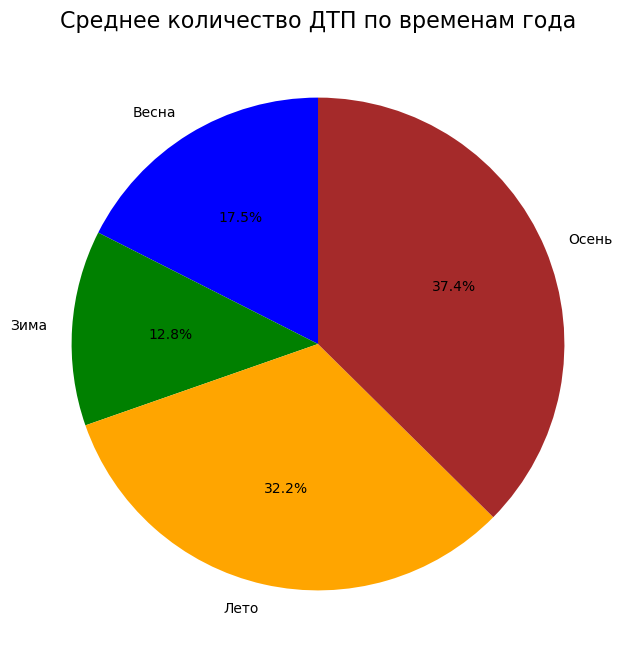

In [18]:
# Преобразование столбца crash_date в формат даты
df['crash_date'] = pd.to_datetime(df['crash_date'], format='%Y%m%d')

# Создаем новый столбец с временем года
def get_season(month):
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Лето'
    else:
        return 'Осень'

df['season'] = df['crash_date'].dt.month.apply(get_season)

# 1. Круговая диаграмма среднего количества ДТП по временам года
season_counts = df['season'].value_counts().sort_index()
plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'orange', 'brown'])
plt.title('Среднее количество ДТП по временам года', fontsize=16)
plt.show()

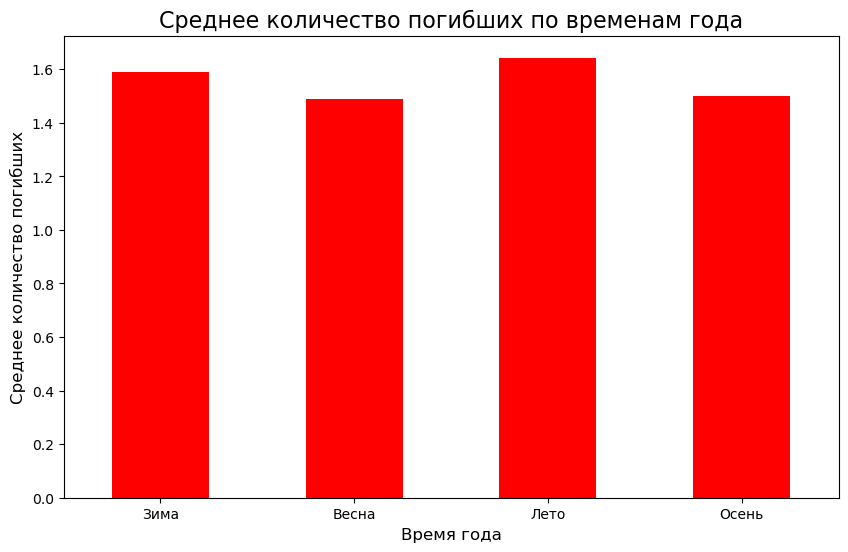

In [19]:
# 2. Столбчатая диаграмма среднего количества погибших по временам года
fatalities_by_season = df.groupby('season')['fatalities_amount'].mean().reindex(['Зима', 'Весна', 'Лето', 'Осень'])
plt.figure(figsize=(10, 6))
fatalities_by_season.plot(kind='bar', color='red')
plt.title('Среднее количество погибших по временам года', fontsize=16)
plt.xlabel('Время года', fontsize=12)
plt.ylabel('Среднее количество погибших', fontsize=12)
plt.xticks(rotation=0)
plt.show()

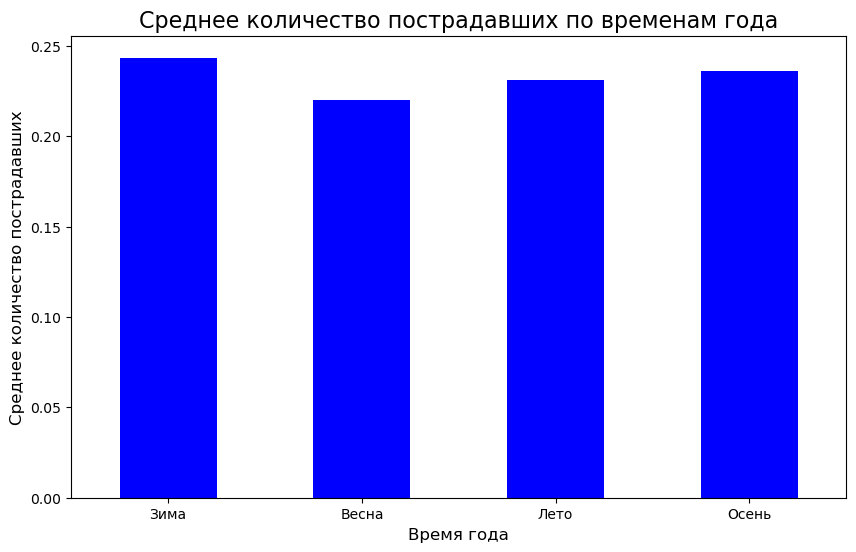

In [20]:
# 3. Столбчатая диаграмма среднего количества пострадавших по временам года
victims_by_season = df.groupby('season')['victims_amount'].mean().reindex(['Зима', 'Весна', 'Лето', 'Осень'])
plt.figure(figsize=(10, 6))
victims_by_season.plot(kind='bar', color='blue')
plt.title('Среднее количество пострадавших по временам года', fontsize=16)
plt.xlabel('Время года', fontsize=12)
plt.ylabel('Среднее количество пострадавших', fontsize=12)
plt.xticks(rotation=0)
plt.show()

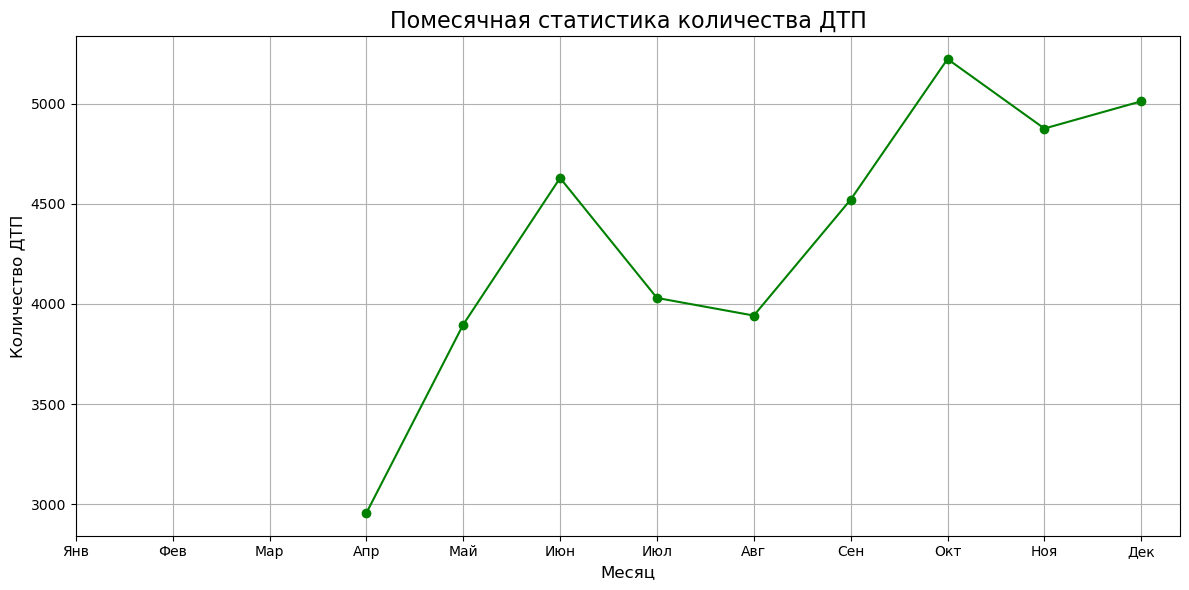

In [21]:
# 4. Линейный график с помесячной статистикой количества ДТП
monthly_stats = df.groupby(df['crash_date'].dt.month).size()
plt.figure(figsize=(12, 6))
plt.plot(monthly_stats.index, monthly_stats.values, marker='o', color='green')
plt.title('Помесячная статистика количества ДТП', fontsize=16)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество ДТП', fontsize=12)
plt.xticks(range(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Проверяем, есть ли данные за январь и февраль
monthly_data = df['crash_date'].dt.month.value_counts().sort_index()
print("Количество ДТП по месяцам:")
print(monthly_data)

Количество ДТП по месяцам:
crash_date
4     2956
5     3897
6     4629
7     4030
8     3942
9     4521
10    5223
11    4876
12    5012
Name: count, dtype: int64


Ответьте на вопросы:

В какое время года самое большое количество ДТП?

Одинаковая ли тенденция сезонности по параметрам среднее количество пострадавших и погибших?

Стоит ли доверять полученной аналитики по сезонам?

In [23]:
# Группируем данные по сезонам и считаем количество ДТП
season_counts = df['season'].value_counts().sort_index()

# Находим сезон с максимальным количеством ДТП
most_dangerous_season = season_counts.idxmax()
print(f"Самое большое количество ДТП происходит в: {most_dangerous_season}")

Самое большое количество ДТП происходит в: Осень
